# estimated model is: y = a0 + a1*x + e

# x and y are independent, so null hypothesis is true

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0004133
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.984
Time:                        11:36:13   Log-Likelihood:                -174.78
No. Observations:                 100   AIC:                             353.6
Df Residuals:                      98   BIC:                             358.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0937      0.142     -0.662      0.5

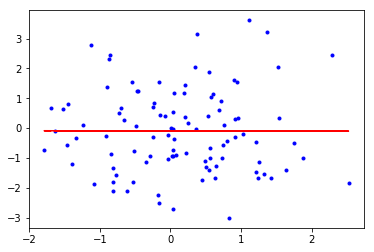

In [49]:
import statsmodels.api as sm
import numpy as np

# Artificial data:
num_obs = 100

x = np.random.normal(loc=0.0, scale=1.0, size=num_obs)
X = sm.add_constant(x)

y_true = np.random.normal(loc=0.0, scale=1.0, size=num_obs)
e = np.random.normal(size=num_obs)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

fig, ax = plt.subplots()
ax.plot(x, y, 'b.', label="data")
ax.plot(x, results.fittedvalues, 'r-', label="OLS")

plt.show()

In [56]:
import numpy as np
import statsmodels.api as sm

np.random.seed(9876789)

num_obs = 100
N = 10000

output = []
for i in range(N):
    x = np.random.normal(loc=0.0, scale=1.0, size=num_obs)
    X = sm.add_constant(x)

    y_true = np.random.normal(loc=0.0, scale=1.0, size=num_obs)
    e = np.random.normal(size=num_obs)
    y = y_true + e

    model = sm.OLS(y, X)
    results = model.fit()

    output.append(results.pvalues[1])

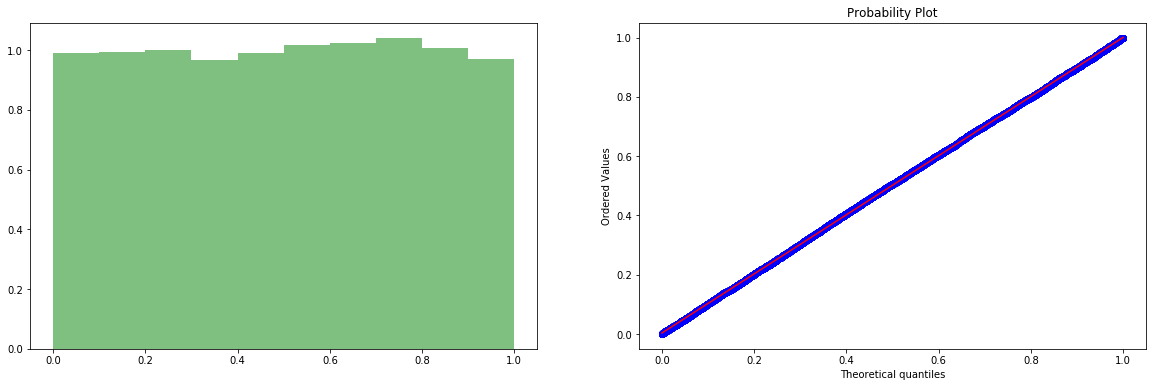

KstestResult(statistic=0.0069159081046553661, pvalue=0.72518493836969244)

In [71]:
import matplotlib.pyplot as plt
import scipy.stats

fig, ax = plt.subplots(figsize=(20,6))

# the histogram of the data
plt.subplot(1, 2, 1)
n, bins, _ = plt.hist(output, bins=np.linspace(0,1,11), density=True, facecolor='green', alpha=0.5)

# probability plot (pp-plot) against uniform distribution
plt.subplot(1, 2, 2)
scipy.stats.probplot(output, dist="uniform", plot=plt)

plt.show()

# Null hypothesis is that output distr. is uniform
scipy.stats.kstest(output, 'uniform')